In [16]:
# Import packages for use in notebook

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import pandas as pd
from itertools import cycle, islice

import seaborn as sns

%matplotlib inline

In [17]:
os.chdir("/Users/euan-soutter/Desktop/Python/Field/Azerbaijan/Data") # Sets working directory

df = pd.read_csv("az_beds_mm.csv") # Loads data from working directory and assigns name 'df'

pd.set_option('display.max_columns', 500) # Displays all columns

df.head()# Displays statistical descriptions of df

,Bed_Number,beds_1A,gsize_1A,facies_1A,lith_1A,amal_1A,beds_1B,gsize_1B,facies_1B,lith_1B,amal_1B,beds_1C,gsize_1C,facies_1C,lith_1C,amal_1C,beds_2A,gsize_2A,facies_2A,lith_2A,amal_2A,beds_3A,gsize_3A,facies_3A,lith_3A,amal_3A,beds_3B,gsize_3B,facies_3B,lith_3B,amal_3B,beds_4A,gsize_4A,facies_4A,lith_4A,amal_4A,beds_5A,gsize_5A,facies_5A,lith_5A,amal_5A,beds_5B,gsize_5B,facies_5B,lith_5B,amal_5B,beds_5C,gsize_5C,facies_5C,lith_5C,amal_5C,beds_6A,gsize_6A,facies_6A,lith_6A,amal_6A,beds_7A,gsize_7A,facies_7A,lith_7A,amal_7A,beds_7B,gsize_7B,facies_7B,lith_7B,amal_7B,beds_7C,gsize_7C,facies_7C,lith_7C,amal_7C,beds_7D,gsize_7D,facies_7D,lith_7D,amal_7D,beds_8A,gsize_8A,facies_8A,lith_8A,amal_8A,beds_8B,gsize_8B,facies_8B,lith_8B,amal_8B,beds_8C,gsize_8C,facies_8C,lith_8C,amal_8C,beds_9A,gsize_9A,facies_9A,lith_9A,amal_9A,beds_10A,gsize_10A,facies_10A,lith_10A,amal_10A,beds_11A,gsize_11A,facies_11A,lith_11A,amal_11A,beds_12A,gsize_12A,facies_12A,lith_12A,amal_12A,beds_13A,gsize_13A,facies_13A,lith_13A,amal_13A,beds_13B,gsize_13B,facies_13B,lith_13B,amal_13B
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,4.0,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,1.0,0.0,3.5,3.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,190.0,3.0,7.0,2.0,0.0,16.0,6.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,137.0,5.0,7.0,2.0,1.0,18.0,8.0,4.0,2.0,NaN,16.0,3.0,4.0,1.0,NaN,295.0,8.0,7.0,2.0,1.0,3.5,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,7.0,7.0,2.0,0.0,5.0,3.0,3.0,1.0,NaN,53.0,3.0,6.0,2.0,NaN,12.0,6.0,4.0,2.0,NaN,16.0,5.0,4.0,1.0,1.0,73.0,8.0,7.0,2.0,1.0
1,2,NaN,NaN,NaN,NaN,NaN,80.0,5.0,5.0,1.0,1.0,15.0,5.0,6.0,1.0,0.0,12.0,4.0,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,7.0,5.0,2.0,0.0,6.0,6.0,3.0,2.0,0.0,6.0,5.0,3.0,2.0,0.0,35.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,8.0,5.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,6.0,2.0,NaN,194.0,8.0,7.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,6.0,2.0,2.0,1.0,92.0,8.0,7.0,2.0,1.0
2,3,24.0,3.0,4.0,1.0,0.0,24.0,4.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,3.0,1.0,0.0,2.5,3.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,58.0,7.0,5.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,3.0,2.0,NaN,13.5,4.0,4.0,1.0,NaN,30.0,8.0,7.0,2.0,1.0,3.0,3.0,3.0,2.0,NaN,17.0,3.0,4.0,2.0,1.0,13.0,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,1.0,NaN,10.0,7.0,3.0,2.0,NaN,4.5,3.0,3.0,1.0,1.0,267.0,8.0,7.0,2.0,NaN,70.0,6.0,5.0,2.0,1.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,4.0,4.0,1.0,0.0,33.0,4.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,4.0,3.0,1.0,0.0,15.0,3.0,4.0,1.0,1.0,26.0,5.0,5.0,2.0,0.0,18.0,7.0,2.0,2.0,0.0,2.0,3.0,3.0,1.0,0.0,80.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,4.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,13.0,5.0,3.0,2.0,1.0,2.0,6.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,3.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,135.0,8.0,7.0,2.0,1.0
4,5,15.0,3.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,4.0,4.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0,0.0,8.0,3.0,3.0,1.0,1.0,102.0,5.0,7.0,2.0,0.0,7.0,7.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,5.0,7.0,2.0,1.0,4.0,6.0,3.0,2.0,NaN,2.0,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0,3.0,2.0,1.0,10.0,5.0,3.0,2.0,1.0,17.0,5.0,3.0,2.0,1.0,10.0,4.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.0,1.0,NaN,1.0,3.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,6.0,3.0,2.0,NaN,65.0,8.0,7.0,2.0,1.0


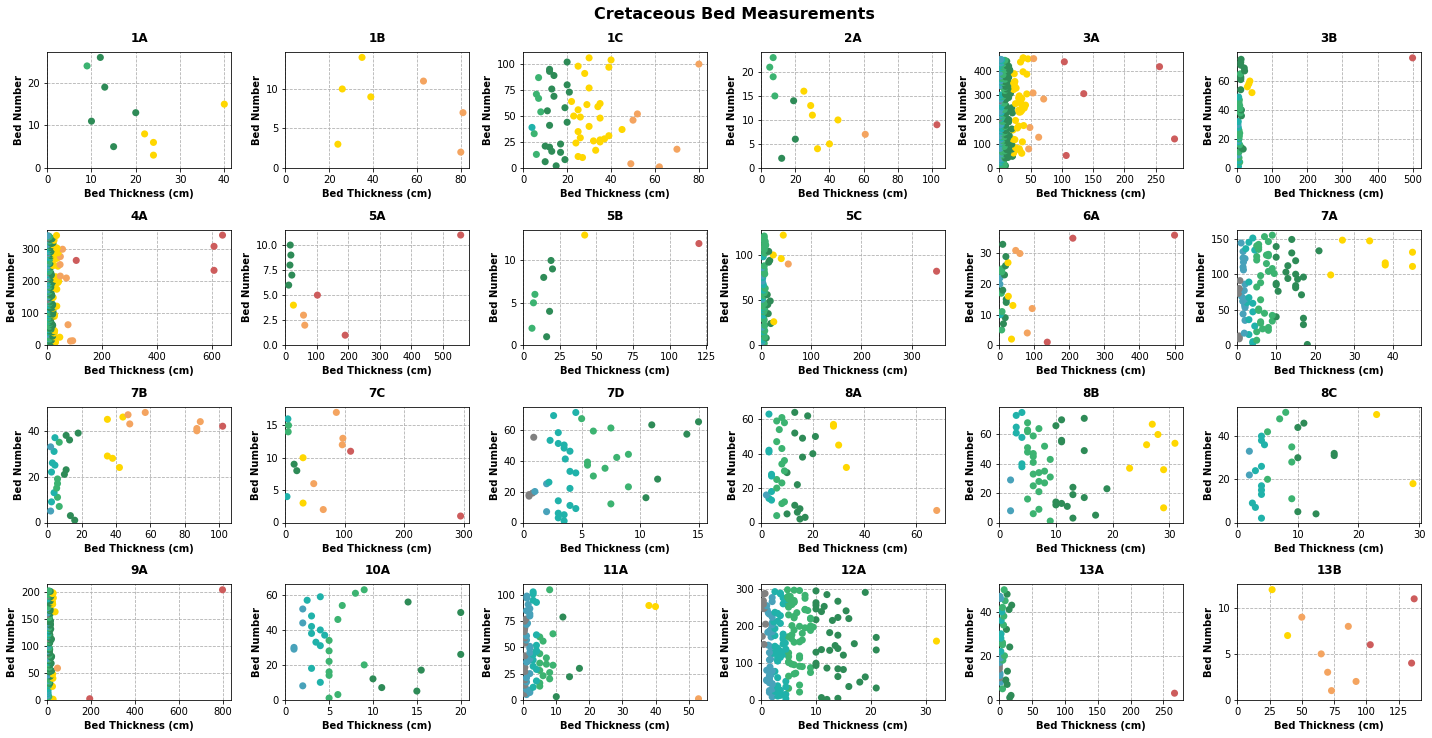

In [18]:
fig, axes = plt.subplots(ncols=6,nrows=4,figsize=(20,10))

colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold","sandybrown"]
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("grey")
cmap.set_over("indianred")
norm = mpl.colors.LogNorm(vmin=1, vmax=100)

edgecolors = 'none'
linewidth=0.5
    
def plt_graph(x, y, x_label, y_label, title, ax):
        ax=ax
        ax.scatter(x, y, c=x ,s=50,cmap=cmap,norm=norm,zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10)
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=0)
        ax.grid(zorder=0,linestyle='dashed')

plt_graph(df.beds_1A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','1A', axes[0,0])
plt_graph(df.beds_1B, df.Bed_Number,'Bed Thickness (cm)','Bed Number','1B', axes[0,1])
plt_graph(df.beds_1C, df.Bed_Number,'Bed Thickness (cm)','Bed Number','1C', axes[0,2])
plt_graph(df.beds_2A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','2A', axes[0,3])
plt_graph(df.beds_3A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','3A', axes[0,4])
plt_graph(df.beds_3B, df.Bed_Number,'Bed Thickness (cm)','Bed Number','3B', axes[0,5])
plt_graph(df.beds_4A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','4A', axes[1,0])
plt_graph(df.beds_5A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','5A', axes[1,1])
plt_graph(df.beds_5B, df.Bed_Number,'Bed Thickness (cm)','Bed Number','5B', axes[1,2])
plt_graph(df.beds_5C, df.Bed_Number,'Bed Thickness (cm)','Bed Number','5C', axes[1,3])
plt_graph(df.beds_6A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','6A', axes[1,4])
plt_graph(df.beds_7A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','7A', axes[1,5])
plt_graph(df.beds_7B, df.Bed_Number,'Bed Thickness (cm)','Bed Number','7B', axes[2,0])
plt_graph(df.beds_7C, df.Bed_Number,'Bed Thickness (cm)','Bed Number','7C', axes[2,1])
plt_graph(df.beds_7D, df.Bed_Number,'Bed Thickness (cm)','Bed Number','7D', axes[2,2])
plt_graph(df.beds_8A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','8A', axes[2,3])
plt_graph(df.beds_8B, df.Bed_Number,'Bed Thickness (cm)','Bed Number','8B', axes[2,4])
plt_graph(df.beds_8C, df.Bed_Number,'Bed Thickness (cm)','Bed Number','8C', axes[2,5])
plt_graph(df.beds_9A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','9A', axes[3,0])
plt_graph(df.beds_10A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','10A', axes[3,1])
plt_graph(df.beds_11A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','11A', axes[3,2])
plt_graph(df.beds_12A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','12A', axes[3,3])
plt_graph(df.beds_13A, df.Bed_Number,'Bed Thickness (cm)','Bed Number','13A', axes[3,4])
plt_graph(df.beds_13B, df.Bed_Number,'Bed Thickness (cm)','Bed Number','13B', axes[3,5])

fig.suptitle('Cretaceous Bed Measurements',y=1.02, x=0.5125, fontsize=16,weight='bold')
plt.tight_layout()
plt.savefig('/Users/euan-soutter/Desktop/Python/Field/Azerbaijan/Figs/az_all_beds.png',
            dpi=400,bbox_inches='tight')

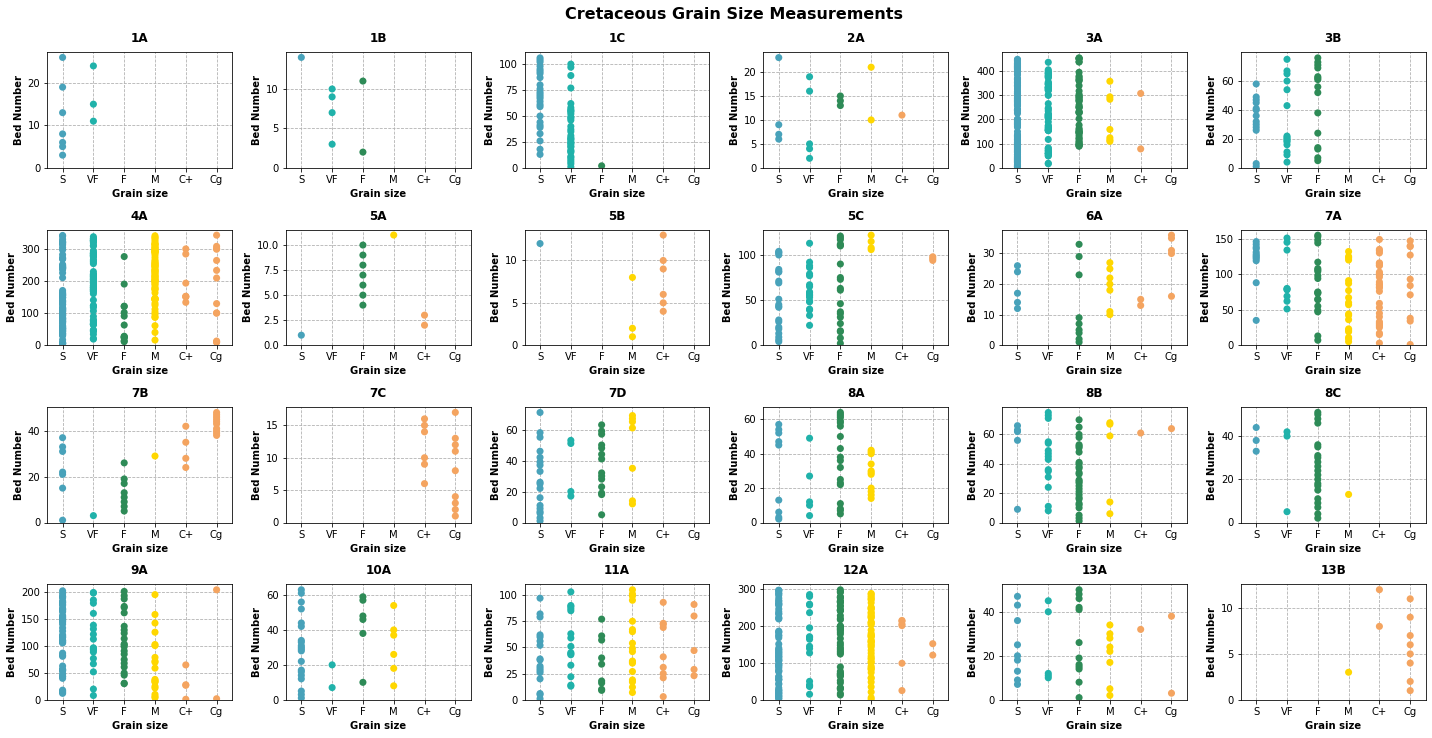

In [19]:
fig, axes = plt.subplots(ncols=6,nrows=4,figsize=(20,10))

colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold","sandybrown"]
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("grey")
cmap.set_over("indianred")
norm = mpl.colors.LogNorm(vmin=3, vmax=8)

edgecolors = 'none'
linewidth=0.5
    
def plt_graph(x, y, x_label, y_label, title, ax):
        ax=ax
        ax.scatter(x, y, c=x ,s=50,cmap=cmap,norm=norm,zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10)
        ax.set_ylim(bottom=0)
        ax.set_xlim(2.5,8.5)
        ax.set_xticks(np.arange(3,8.0001,1))
        ax.set_xticklabels(['S', 'VF', 'F', 'M', 'C+', 'Cg'])
        ax.grid(zorder=0,linestyle='dashed')

plt_graph(df.gsize_1A, df.Bed_Number,'Grain size','Bed Number','1A', axes[0,0])
plt_graph(df.gsize_1B, df.Bed_Number,'Grain size','Bed Number','1B', axes[0,1])
plt_graph(df.gsize_1C, df.Bed_Number,'Grain size','Bed Number','1C', axes[0,2])
plt_graph(df.gsize_2A, df.Bed_Number,'Grain size','Bed Number','2A', axes[0,3])
plt_graph(df.gsize_3A, df.Bed_Number,'Grain size','Bed Number','3A', axes[0,4])
plt_graph(df.gsize_3B, df.Bed_Number,'Grain size','Bed Number','3B', axes[0,5])
plt_graph(df.gsize_4A, df.Bed_Number,'Grain size','Bed Number','4A', axes[1,0])
plt_graph(df.gsize_5A, df.Bed_Number,'Grain size','Bed Number','5A', axes[1,1])
plt_graph(df.gsize_5B, df.Bed_Number,'Grain size','Bed Number','5B', axes[1,2])
plt_graph(df.gsize_5C, df.Bed_Number,'Grain size','Bed Number','5C', axes[1,3])
plt_graph(df.gsize_6A, df.Bed_Number,'Grain size','Bed Number','6A', axes[1,4])
plt_graph(df.gsize_7A, df.Bed_Number,'Grain size','Bed Number','7A', axes[1,5])
plt_graph(df.gsize_7B, df.Bed_Number,'Grain size','Bed Number','7B', axes[2,0])
plt_graph(df.gsize_7C, df.Bed_Number,'Grain size','Bed Number','7C', axes[2,1])
plt_graph(df.gsize_7D, df.Bed_Number,'Grain size','Bed Number','7D', axes[2,2])
plt_graph(df.gsize_8A, df.Bed_Number,'Grain size','Bed Number','8A', axes[2,3])
plt_graph(df.gsize_8B, df.Bed_Number,'Grain size','Bed Number','8B', axes[2,4])
plt_graph(df.gsize_8C, df.Bed_Number,'Grain size','Bed Number','8C', axes[2,5])
plt_graph(df.gsize_9A, df.Bed_Number,'Grain size','Bed Number','9A', axes[3,0])
plt_graph(df.gsize_10A, df.Bed_Number,'Grain size','Bed Number','10A', axes[3,1])
plt_graph(df.gsize_11A, df.Bed_Number,'Grain size','Bed Number','11A', axes[3,2])
plt_graph(df.gsize_12A, df.Bed_Number,'Grain size','Bed Number','12A', axes[3,3])
plt_graph(df.gsize_13A, df.Bed_Number,'Grain size','Bed Number','13A', axes[3,4])
plt_graph(df.gsize_13B, df.Bed_Number,'Grain size','Bed Number','13B', axes[3,5])

fig.suptitle('Cretaceous Grain Size Measurements',y=1.02, x=0.5125, fontsize=16,weight='bold')
plt.tight_layout()
plt.savefig('/Users/euan-soutter/Desktop/Python/Field/Azerbaijan/Figs/az_all_gsize.png',
            dpi=400,bbox_inches='tight')

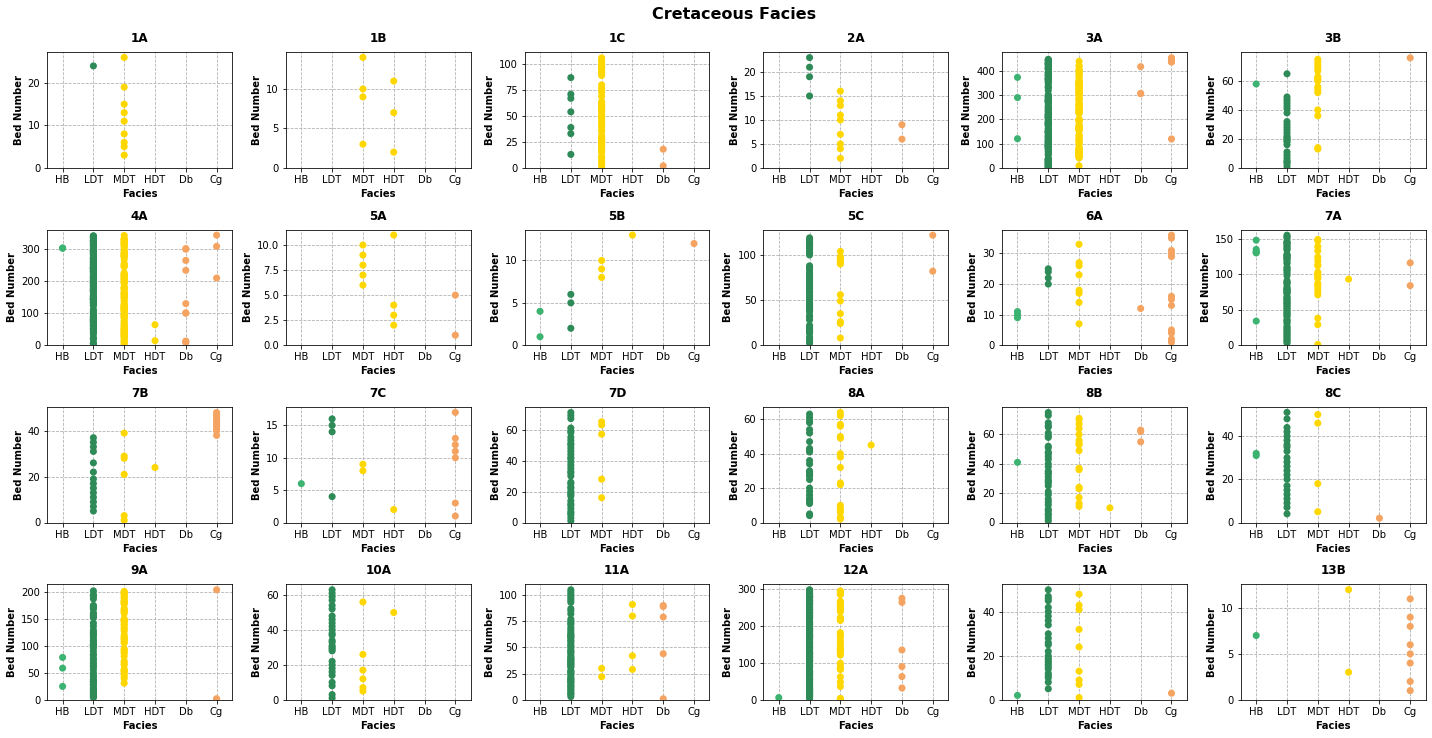

In [20]:
fig, axes = plt.subplots(ncols=6,nrows=4,figsize=(20,10))

colors = ['#48a2ba','lightseagreen','mediumseagreen','seagreen',"gold","sandybrown"]
cmap = mpl.colors.ListedColormap(colors)
cmap.set_under("grey")
cmap.set_over("indianred")
norm = mpl.colors.LogNorm(vmin=1, vmax=7)

edgecolors = 'none'
linewidth=0.5
    
def plt_graph(x, y, x_label, y_label, title, ax):
        ax=ax
        ax.scatter(x, y, c=x ,s=50,cmap=cmap,norm=norm,zorder=12,
        edgecolors=edgecolors,linewidths=linewidth)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10)
        ax.set_ylim(bottom=0)
        ax.set_xlim(1.5,7.5)
        ax.set_xticklabels(['','HB', 'LDT', 'MDT', 'HDT', 'Db', 'Cg'])
        ax.grid(zorder=0,linestyle='dashed')

plt_graph(df.facies_1A, df.Bed_Number,'Facies','Bed Number','1A', axes[0,0])
plt_graph(df.facies_1B, df.Bed_Number,'Facies','Bed Number','1B', axes[0,1])
plt_graph(df.facies_1C, df.Bed_Number,'Facies','Bed Number','1C', axes[0,2])
plt_graph(df.facies_2A, df.Bed_Number,'Facies','Bed Number','2A', axes[0,3])
plt_graph(df.facies_3A, df.Bed_Number,'Facies','Bed Number','3A', axes[0,4])
plt_graph(df.facies_3B, df.Bed_Number,'Facies','Bed Number','3B', axes[0,5])
plt_graph(df.facies_4A, df.Bed_Number,'Facies','Bed Number','4A', axes[1,0])
plt_graph(df.facies_5A, df.Bed_Number,'Facies','Bed Number','5A', axes[1,1])
plt_graph(df.facies_5B, df.Bed_Number,'Facies','Bed Number','5B', axes[1,2])
plt_graph(df.facies_5C, df.Bed_Number,'Facies','Bed Number','5C', axes[1,3])
plt_graph(df.facies_6A, df.Bed_Number,'Facies','Bed Number','6A', axes[1,4])
plt_graph(df.facies_7A, df.Bed_Number,'Facies','Bed Number','7A', axes[1,5])
plt_graph(df.facies_7B, df.Bed_Number,'Facies','Bed Number','7B', axes[2,0])
plt_graph(df.facies_7C, df.Bed_Number,'Facies','Bed Number','7C', axes[2,1])
plt_graph(df.facies_7D, df.Bed_Number,'Facies','Bed Number','7D', axes[2,2])
plt_graph(df.facies_8A, df.Bed_Number,'Facies','Bed Number','8A', axes[2,3])
plt_graph(df.facies_8B, df.Bed_Number,'Facies','Bed Number','8B', axes[2,4])
plt_graph(df.facies_8C, df.Bed_Number,'Facies','Bed Number','8C', axes[2,5])
plt_graph(df.facies_9A, df.Bed_Number,'Facies','Bed Number','9A', axes[3,0])
plt_graph(df.facies_10A, df.Bed_Number,'Facies','Bed Number','10A', axes[3,1])
plt_graph(df.facies_11A, df.Bed_Number,'Facies','Bed Number','11A', axes[3,2])
plt_graph(df.facies_12A, df.Bed_Number,'Facies','Bed Number','12A', axes[3,3])
plt_graph(df.facies_13A, df.Bed_Number,'Facies','Bed Number','13A', axes[3,4])
plt_graph(df.facies_13B, df.Bed_Number,'Facies','Bed Number','13B', axes[3,5])

fig.suptitle('Cretaceous Facies',y=1.02, x=0.5125, fontsize=16,weight='bold')
plt.tight_layout()
plt.savefig('/Users/euan-soutter/Desktop/Python/Field/Azerbaijan/Figs/az_all_facies.png',
            dpi=400,bbox_inches='tight')

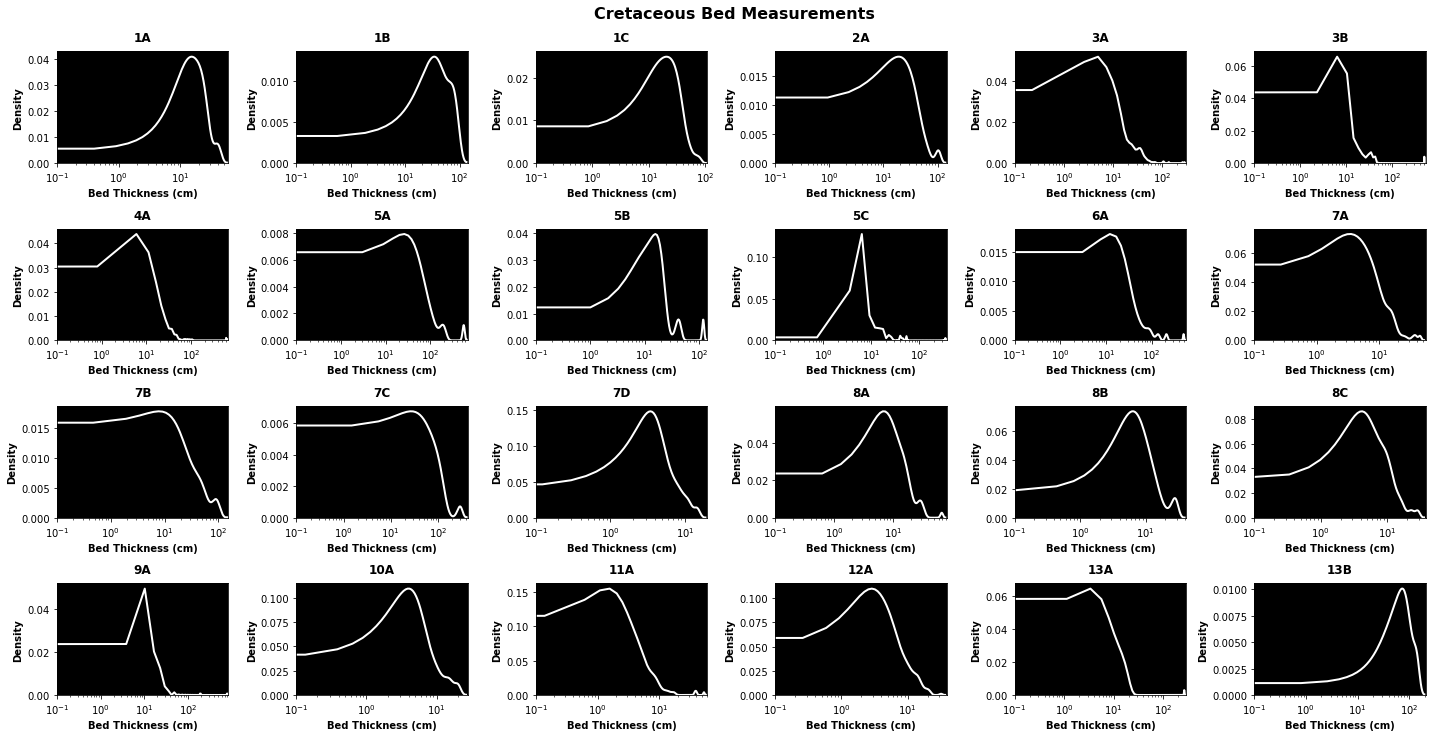

In [43]:
fig, axes = plt.subplots(ncols=6,nrows=4,figsize=(20,10))
edgecolors = 'none'
linewidth=0.5
    
def plt_graph(x, y, x_label, y_label, title, ax):
        ax=ax
        x = x.dropna()
#          ax.plot(y, x, '-o',color='w',zorder=12)
        sns.distplot(x,bins=10,hist=False,color='w',kde_kws=dict(linewidth=2),ax=ax)
        ax.set_ylabel(y_label,weight='bold')
        ax.set_xlabel(x_label,weight='bold')
        ax.set_title(title,weight='bold',pad=10)
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=0.1)
#         ax.set_xticks(np.arange(0.1,100,10))
        ax.set_xscale('log')
#         ax.grid(zorder=0,linestyle='dashed')
        ax.set_facecolor('k')

plt_graph(df.beds_1A, df.Bed_Number,'Bed Thickness (cm)','Density','1A', axes[0,0])
plt_graph(df.beds_1B, df.Bed_Number,'Bed Thickness (cm)','Density','1B', axes[0,1])
plt_graph(df.beds_1C, df.Bed_Number,'Bed Thickness (cm)','Density','1C', axes[0,2])
plt_graph(df.beds_2A, df.Bed_Number,'Bed Thickness (cm)','Density','2A', axes[0,3])
plt_graph(df.beds_3A, df.Bed_Number,'Bed Thickness (cm)','Density','3A', axes[0,4])
plt_graph(df.beds_3B, df.Bed_Number,'Bed Thickness (cm)','Density','3B', axes[0,5])
plt_graph(df.beds_4A, df.Bed_Number,'Bed Thickness (cm)','Density','4A', axes[1,0])
plt_graph(df.beds_5A, df.Bed_Number,'Bed Thickness (cm)','Density','5A', axes[1,1])
plt_graph(df.beds_5B, df.Bed_Number,'Bed Thickness (cm)','Density','5B', axes[1,2])
plt_graph(df.beds_5C, df.Bed_Number,'Bed Thickness (cm)','Density','5C', axes[1,3])
plt_graph(df.beds_6A, df.Bed_Number,'Bed Thickness (cm)','Density','6A', axes[1,4])
plt_graph(df.beds_7A, df.Bed_Number,'Bed Thickness (cm)','Density','7A', axes[1,5])
plt_graph(df.beds_7B, df.Bed_Number,'Bed Thickness (cm)','Density','7B', axes[2,0])
plt_graph(df.beds_7C, df.Bed_Number,'Bed Thickness (cm)','Density','7C', axes[2,1])
plt_graph(df.beds_7D, df.Bed_Number,'Bed Thickness (cm)','Density','7D', axes[2,2])
plt_graph(df.beds_8A, df.Bed_Number,'Bed Thickness (cm)','Density','8A', axes[2,3])
plt_graph(df.beds_8B, df.Bed_Number,'Bed Thickness (cm)','Density','8B', axes[2,4])
plt_graph(df.beds_8C, df.Bed_Number,'Bed Thickness (cm)','Density','8C', axes[2,5])
plt_graph(df.beds_9A, df.Bed_Number,'Bed Thickness (cm)','Density','9A', axes[3,0])
plt_graph(df.beds_10A, df.Bed_Number,'Bed Thickness (cm)','Density','10A', axes[3,1])
plt_graph(df.beds_11A, df.Bed_Number,'Bed Thickness (cm)','Density','11A', axes[3,2])
plt_graph(df.beds_12A, df.Bed_Number,'Bed Thickness (cm)','Density','12A', axes[3,3])
plt_graph(df.beds_13A, df.Bed_Number,'Bed Thickness (cm)','Density','13A', axes[3,4])
plt_graph(df.beds_13B, df.Bed_Number,'Bed Thickness (cm)','Density','13B', axes[3,5])

fig.suptitle('Cretaceous Bed Measurements',y=1.02, x=0.5125, fontsize=16,weight='bold')
plt.tight_layout()
plt.savefig('/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Figs/az_unknown.png',
            dpi=400,bbox_inches='tight')